In [6]:
INPUT = '/media/ranjan/dl/smartzoo/data/training/'
OUTPUT = '/media/ranjan/dl/smartzoo/data'

In [54]:
from pathlib import Path
from skimage.io import imread 
from matplotlib import pyplot as plt
from math import ceil
from random import shuffle
from collections import Counter, OrderedDict
import os
import shutil
%matplotlib inline

In [63]:
imagepaths = [str(path) for path in Path(INPUT).glob('*/*') if str(path).split('.')[-1] in ['png', 'jpg', 'jpeg']]
outputpath = Path(OUTPUT)

In [64]:
print(f'Number of images {len(imagepaths)}')

Number of images 13499


In [65]:
shuffle(imagepaths)

In [66]:
categorycount = OrderedDict(Counter([str(path).split('/')[-2] for path in imagepaths]))

<BarContainer object of 6 artists>

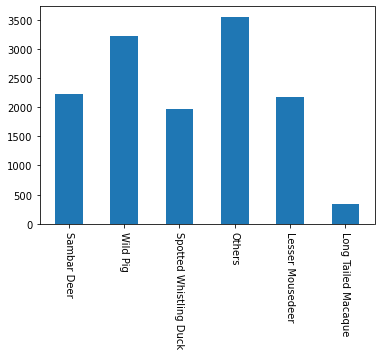

In [67]:
plt.xticks(rotation=-90)
plt.bar(categorycount.keys(), categorycount.values(), width=0.5, align='center')

In [68]:
categorysplit = OrderedDict()
for path in imagepaths:
    category = path.split('/')[-2]
    imagename = path.split('/')[-1]
    categorysplit[category] = categorysplit.get(category, 0) + 1
    fold = 'train' if categorysplit[category] < ceil(categorycount[category] * 0.7) else 'valid'
    os.makedirs(outputpath/fold/category, exist_ok=True)
    shutil.copy(path, outputpath/fold/category/imagename)